In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
# Example graph (undirected, connected)
G = nx.karate_club_graph()

# Adjacency matrix
A = nx.to_numpy_array(G)
N = A.shape[0]

## P9.1

In [3]:
def ergodic_density_analytical(A):
    degrees = A.sum(axis=1)
    pi = degrees / degrees.sum()
    return pi

In [5]:
def markov_matrix(A):
    degrees = A.sum(axis=1)
    P = np.zeros_like(A)

    for i in range(len(degrees)):
        if degrees[i] > 0:
            P[:, i] = A[i, :] / degrees[i]

    return P

In [20]:
pi_analytical = ergodic_density_analytical(A)

In [21]:
P = markov_matrix(A)

## P9.2

In [7]:
def ergodic_density_eigen(P):
    eigvals, eigvecs = np.linalg.eig(P)
    idx = np.argmin(np.abs(eigvals - 1))
    pi = np.real(eigvecs[:, idx])
    pi = pi / pi.sum()
    return pi

In [22]:
pi_eigen = ergodic_density_eigen(P)
print(pi_eigen)

[0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351 0.01731602 0.00649351
 0.00865801 0.03679654 0.01082251 0.01515152 0.01298701 0.00649351
 0.00649351 0.01082251 0.00865801 0.00865801 0.01082251 0.04545455
 0.01515152 0.03030303 0.01298701 0.02813853 0.01298701 0.02813853
 0.02380952 0.04545455 0.08225108 0.1038961 ]


## P9.3

In [9]:
def ergodic_density_iterative(P, tol=1e-10, max_iter=10000):
    N = P.shape[0]
    pi = np.ones(N) / N

    for _ in range(max_iter):
        pi_next = P @ pi
        if np.linalg.norm(pi_next - pi, 1) < tol:
            break
        pi = pi_next

    return pi

In [30]:
pi_iter = ergodic_density_iterative(P)
print(pi_iter)
np.abs(pi_iter - pi_eigen) < 1e-10

[0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351 0.01731602 0.00649351
 0.00865801 0.03679654 0.01082251 0.01515152 0.01298701 0.00649351
 0.00649351 0.01082251 0.00865801 0.00865801 0.01082251 0.04545455
 0.01515152 0.03030303 0.01298701 0.02813853 0.01298701 0.02813853
 0.02380952 0.04545455 0.08225108 0.1038961 ]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [31]:
np.abs(pi_iter - pi_analytical) < 1e-10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [32]:
np.abs(pi_eigen - pi_analytical) < 1e-10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## P9.5

In [11]:
def pagerank(P, alpha=0.85, tol=1e-10, max_iter=10000):
    N = P.shape[0]
    pi = np.ones(N) / N
    teleport = np.ones(N) / N

    for _ in range(max_iter):
        pi_next = alpha * (P @ pi) + (1 - alpha) * teleport
        if np.linalg.norm(pi_next - pi, 1) < tol:
            break
        pi = pi_next

    return pi

In [33]:
pr = pagerank(P)
print(pr)

[0.08850032 0.05741232 0.06276562 0.03721003 0.0205008  0.03380387
 0.03152302 0.0264632  0.03338248 0.00946349 0.02068568 0.009785
 0.01147426 0.03347292 0.0129424  0.01637744 0.01675226 0.0096767
 0.00954534 0.01307699 0.01122488 0.01135947 0.01296139 0.04114976
 0.01663573 0.02867645 0.01524172 0.02723773 0.01447923 0.02827467
 0.02303285 0.04198818 0.07593442 0.09698936]


### modified PG

In [13]:
def personalized_pagerank(P, v, alpha=0.85):
    v = v / v.sum()
    N = P.shape[0]
    pi = np.ones(N) / N

    for _ in range(10000):
        pi_next = alpha * (P @ pi) + (1 - alpha) * v
        if np.linalg.norm(pi_next - pi, 1) < 1e-10:
            break
        pi = pi_next

    return pi

In [34]:
v = np.zeros(N)
v[0] = 1.0  # bias toward node 0
pr_personalized = personalized_pagerank(P, v)
print(pr_personalized)

[0.25868941 0.07619208 0.07488757 0.04892302 0.0305035  0.04621652
 0.04341513 0.03405008 0.02852133 0.00351574 0.02861176 0.01570614
 0.01216614 0.04196998 0.00374085 0.00532767 0.01693405 0.01270398
 0.00230483 0.0157306  0.00294744 0.01493719 0.00381625 0.01489316
 0.00565732 0.01143223 0.00378725 0.01150363 0.0074573  0.00841343
 0.01327889 0.02486196 0.03209935 0.04480422]


## P9.6

In [38]:
def random_walk_matrix(G):
    """Return the random-walk transition matrix P for an undirected graph G"""
    A = nx.to_numpy_array(G)  # adjacency matrix
    degrees = A.sum(axis=1)
    # avoid division by zero: assume G is connected
    P = A / degrees[:, None]
    return P


def second_largest_eigenvalue(P):
    """Return the 2nd largest eigenvalue (absolute) of P"""
    eigvals = np.linalg.eigvals(P)
    eigvals = np.real_if_close(eigvals)
    # sort by absolute value, descending
    eigvals_sorted = sorted(eigvals, key=lambda x: -abs(x))
    return eigvals_sorted[1]


def best_graph_for_diffusion(n, m):
    """
    Search all simple graphs on n vertices with exactly m edges
    and return the graph with the smallest absolute 2nd eigenvalue for the random walk
    """
    nodes = list(range(n))
    # all possible edges
    all_edges = list(itertools.combinations(nodes, 2))

    best_G = None
    best_lambda2 = None

    for edges in itertools.combinations(all_edges, m):
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)

        # We only care about connected graphs for diffusion
        if not nx.is_connected(G):
            continue

        P = random_walk_matrix(G)
        lam2 = abs(second_largest_eigenvalue(P))

        if best_lambda2 is None or lam2 < best_lambda2:
            best_lambda2 = lam2
            best_G = G

    return best_G, best_lambda2


Best graph edges: [(0, 1), (0, 2), (0, 3), (2, 3), (3, 4)]
Best |lambda_2|: 0.7675918792439977


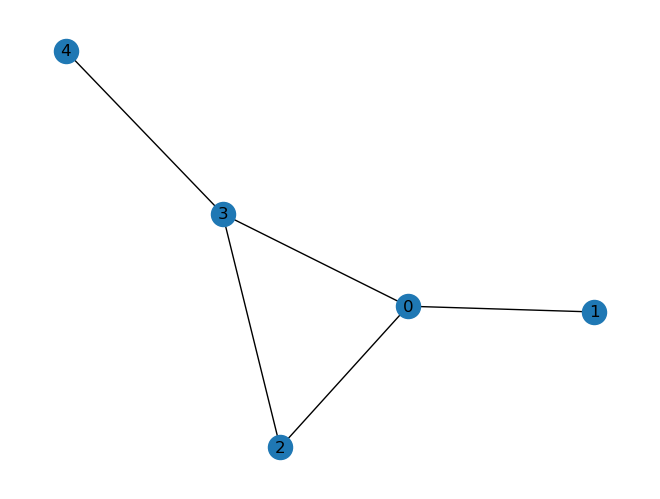

In [39]:
n = 5  # number of vertices
m = 5  # number of edges

G_best, lam2_best = best_graph_for_diffusion(n, m)
print("Best graph edges:", G_best.edges())
print("Best |lambda_2|:", lam2_best)

nx.draw(G_best, with_labels=True)
plt.show()

Best graph edges: [(0, 1), (0, 2), (0, 3), (0, 5), (1, 2), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 6)]
Best |lambda_2|: 0.40824829046386263


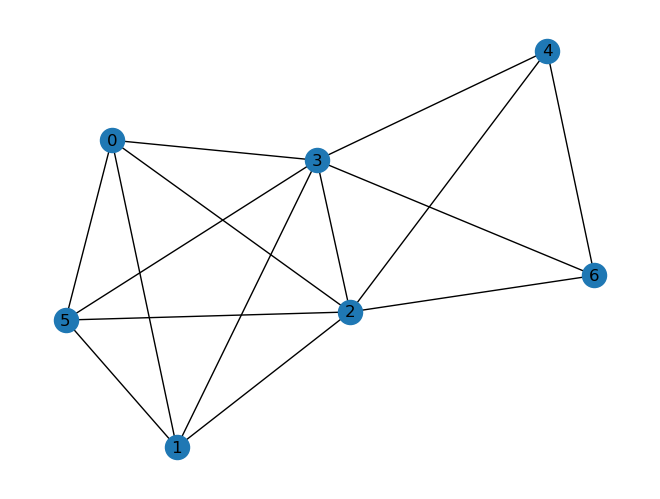

In [42]:
n = 7  # number of vertices
m = 15  # number of edges

G_best, lam2_best = best_graph_for_diffusion(n, m)
print("Best graph edges:", G_best.edges())
print("Best |lambda_2|:", lam2_best)

nx.draw(G_best, with_labels=True)
plt.show()